In [1]:
using DSP, WAV
using Plots
using AbstractFFTs
using ChemometricsTools
using Shapefile
using Images, ImageMagick
using StatsBase
using Distances
using Statistics
using FFTW
using AbstractFFTs

### <span style="color:orange">Generate a tone</span>

In [2]:
Fs = 44100 #Sampling Frequency
seconds = 5 #number of seconds for the sound
tt = range(0, stop=seconds, length=Fs*seconds) #evenly spaced time points where the system was 'sampled'
freq = 1000 #frequency of the signal
ww = 2*pi*freq #radian values for the frequency 
ss = sin.(ww*tt) #create tone

220500-element Array{Float64,1}:
  0.0
  0.14199495756238809
  0.28111235352344605
  0.4145329407523827
  0.5395529193028638
  0.6536387295622679
  0.7544783954400716
  0.840028377113437
  0.908554983847962
  0.958669507652927
  0.9893563657791578
  0.9999936817450847
  0.9903658878116121
  ⋮
 -0.9999936817450945
 -0.9893563657796234
 -0.9586695076539672
 -0.9085549838496798
 -0.8400283771159156
 -0.7544783954433693
 -0.6536387295636624
 -0.5395529193047993
 -0.4145329407548899
 -0.2811123535265278
 -0.1419949575660184
 -4.123661161048562e-12

### <span style="color:orange">Look at the data</span>

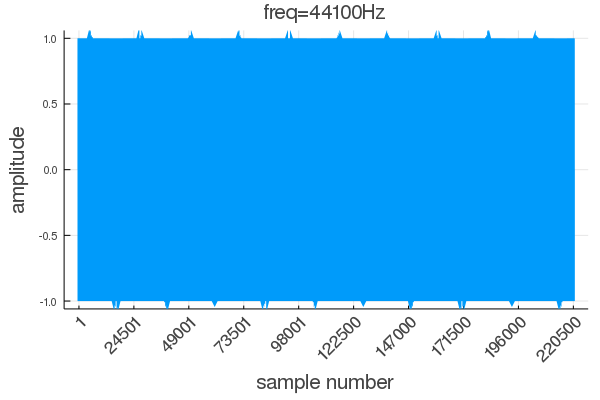

In [4]:
xTicks = Int.(round.(range(1,stop=length(ss),length=10)))
xTickLabels = string.(Int.( Int.(round.(range(1,stop=length(ss),length=10)))))
pp = plot(ss[1:1:end],xtickfontsize=12,legend=false,linewidth=3,xrotation=45,xticks=(xTicks,xTickLabels))
title!(pp,"freq=$(Fs)Hz")
xlabel!("sample number",guidefontsize=14)
ylabel!("amplitude",guidefontsize=14)
display("image/png", pp)
#savefig(p,"figs/figDemo1.png")

### <span style="color:orange">Investigate a single cycle (period)</span>

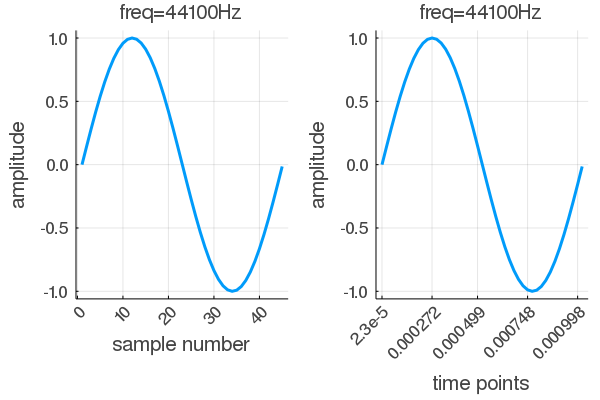

In [5]:
single_cycle_sample_num = Int(round((Fs*1)*(1/freq)))
increment = 1#Int(round( (1/10)*(single_cycle_sample_num) ))

pp1 = plot(ss[ 1:single_cycle_sample_num+1 ],
                     tickfontsize=12,legend=false,linewidth=3,xrotation=45)#,xticks=(xTicks,xTickLabels))
xlabel!("sample number",guidefontsize=14)

xTicks = Int.(round.(range(1,length=5,stop=single_cycle_sample_num)))
xTickLabels = string.(round.( collect(1:single_cycle_sample_num+1) ./ Fs ,digits=6 )[Int.(round.(range(1,length=5,stop=single_cycle_sample_num)))])

pp2 = plot(ss[ 1:single_cycle_sample_num+1 ],
                     tickfontsize=12,legend=false,linewidth=3,xrotation=45,xticks=(xTicks,xTickLabels))
xlabel!("time points",guidefontsize=14)
pp = plot(pp1,pp2,layout=grid(1,2))
title!(pp,"freq=$(Fs)Hz")
#xlabel!("sample number",guidefontsize=14)
ylabel!("amplitude",guidefontsize=14)
display("image/png", pp)

### <span style="color:orange">Let's look at a number of cycles</span>

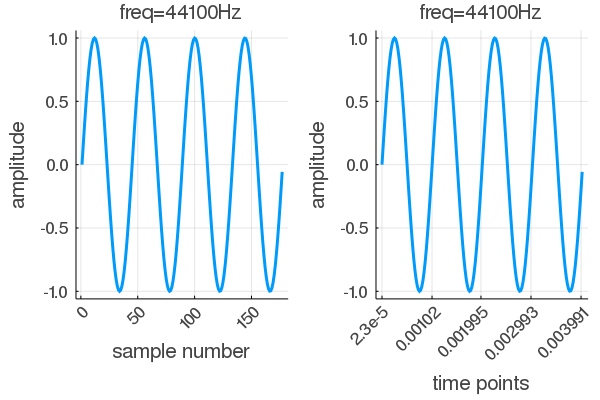

In [6]:
cycle_sample_num = Int(round((Fs*1)*(1/freq))) * 4
increment = 1#Int(round( (1/10)*(single_cycle_sample_num) ))

pp1 = plot(ss[ 1:cycle_sample_num+1 ],
                     tickfontsize=12,legend=false,linewidth=3,xrotation=45)#,xticks=(xTicks,xTickLabels))
xlabel!("sample number",guidefontsize=14)

xTicks = Int.(round.(range(1,length=5,stop=cycle_sample_num)))
xTickLabels = string.(round.( collect(1:cycle_sample_num+1) ./ Fs ,digits=6 )[Int.(round.(range(1,length=5,stop=cycle_sample_num)))])

pp2 = plot(ss[ 1:cycle_sample_num+1 ],
                     tickfontsize=12,legend=false,linewidth=3,xrotation=45,xticks=(xTicks,xTickLabels))
xlabel!("time points",guidefontsize=14)
pp = plot(pp1,pp2,layout=grid(1,2))
title!(pp,"freq=$(Fs)Hz")
ylabel!("amplitude",guidefontsize=14)
display("image/png", pp)

### <span style='color:orange'>Produce a periodogram and find the max frequency what should align with the used value for the production

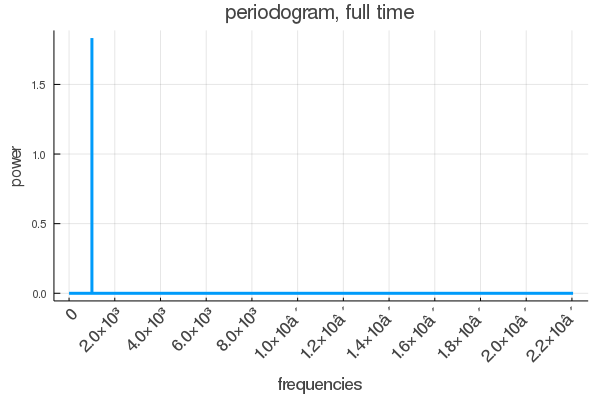

In [7]:
# power spectral density (PSD)
prdgrmFULL = DSP.Periodograms.periodogram(ss, fs=Fs, window=DSP.Windows.hamming)
pp = plot(prdgrmFULL.freq,prdgrmFULL.power,legend=false,linewidth=3,xrotation=45, xticks = 0:2000:prdgrmFULL.freq[end],     
               xlabel="frequencies",xguidefontsize=12,xtickfontsize=12,ylabel="power",
                title="periodogram, full time")
display("image/png", pp)

In [8]:
#which is the max power freq?
max_index = findall( prdgrmFULL.power .== maximum(prdgrmFULL.power) )
prdgrmFULL.freq[max_index]

1-element Array{Float64,1}:
 1000.0

### <span style="color:orange">Now produce a spectrogram for this signal data</span>

In [9]:
spgrm = DSP.Periodograms.spectrogram(ss, fs=Fs, window=DSP.Windows.hamming)

DSP.Periodograms.Spectrogram{Float64,AbstractFFTs.Frequencies{Float64}}([1.7844649037585608e-14 2.8848089229549784e-14 … 3.4606856174586784e-13 3.856346307905476e-13; 5.256807539615801e-13 5.447421608764894e-13 … 1.0942674277807838e-12 1.1628082583600923e-12; … ; 1.8844652483141778e-14 1.8747578276163703e-14 … 1.594900684298149e-14 1.5599948440931996e-14; 9.411014623407238e-15 9.354977889279782e-15 … 7.739482423122924e-15 7.537985958457924e-15], [0.0, 1.5950520833333333, 3.1901041666666665, 4.78515625, 6.380208333333333, 7.975260416666666, 9.5703125, 11.165364583333332, 12.760416666666666, 14.35546875  …  22035.64453125, 22037.239583333332, 22038.834635416664, 22040.4296875, 22042.024739583332, 22043.619791666664, 22045.21484375, 22046.809895833332, 22048.404947916664, 22050.0], 0.31249433106575963:0.31249433106575963:4.687414965986394)

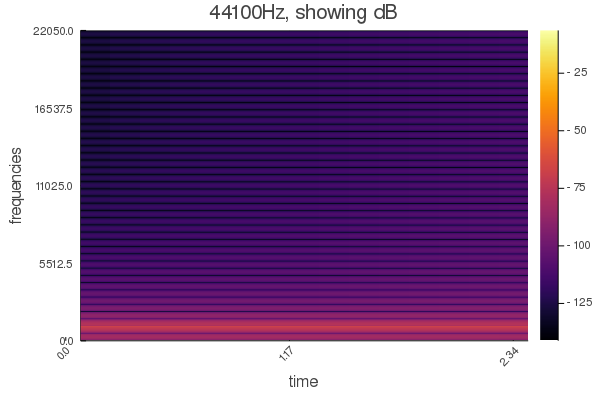

In [11]:
hmap = heatmap( pow2db.(spgrm.power),xlabel="time",xrotation=45,          
              yticks=(range(0,stop=spgrm.freq.n,length=5),
                  string.(range(0,stop=maximum(Int.(round.(spgrm.freq))),length=5)))   ,ylabel="frequencies",
     xticks=( round.(range(0,stop=2*length(spgrm.time),length=5),digits=2),
             string.(round.(range(0,stop=maximum(spgrm.time),length=5),digits=2)))  ,legend=true )
pp = plot(hmap) 
title!("$(Fs)Hz, showing dB")
display("image/png", pp)

### <span style="color:orange">Write this signal data to a WAV file</span>

In [12]:
wavwrite(ss, "./fileWAVs/signal1.wav", Fs=Fs)

### <span style="color:orange">Now read the WAV file back in</span>

In [13]:
ss2, Fs2 = wavread("./fileWAVs/signal1.wav")

([0.0; 0.14199495315551758; … ; -0.14199495315551758; -4.1236610480444025e-12], 44100.0f0, 0x0020, WAVChunk[WAVChunk(Symbol("fmt "), UInt8[0x28, 0x00, 0x00, 0x00, 0xfe, 0xff, 0x01, 0x00, 0x44, 0xac  …  0x10, 0x00, 0x80, 0x00, 0x00, 0xaa, 0x00, 0x38, 0x9b, 0x71])])

In [14]:
Fs2

44100.0f0

In [15]:
Int(Fs2)

44100

In [16]:
size(ss2)

(220500, 1)

In [17]:
#make into a vector
size(vec(ss2))

(220500,)

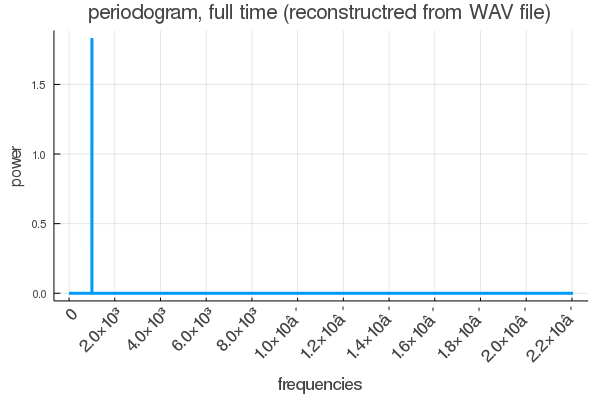

In [18]:
prdgrmFULL = DSP.Periodograms.periodogram(vec(ss2), fs=Int(Fs2), window=DSP.Windows.hamming)
pp = plot(prdgrmFULL.freq,prdgrmFULL.power,legend=false,linewidth=3,xrotation=45, xticks = 0:2000:prdgrmFULL.freq[end],     
               xlabel="frequencies",xguidefontsize=12,xtickfontsize=12,ylabel="power",
                title="periodogram, full time (reconstructred from WAV file)")
display("image/png", pp)

### <span style="color:orange">A new signal</span>

In [19]:
freq_new = 6000 #frequency of the signal
ww_new = 2*pi*freq_new #radian values for the frequency 
ss_new = sin.(ww_new*tt) #create tone

220500-element Array{Float64,1}:
  0.0
  0.7544783954400717
  0.990365887811612
  0.545525153593016
 -0.2742824236236346
 -0.9055619122661379
 -0.9144032069128477
 -0.29472924160290476
  0.5275269374421354
  0.987187351605763
  0.7683043067900829
  0.021327115478250714
 -0.7403092736880963
  ⋮
 -0.021327115469068167
 -0.7683043067777946
 -0.98718735160578
 -0.5275269374507326
  0.2947292415836658
  0.9144032069124256
  0.905561912270828
  0.27428242364389543
 -0.5455251535913579
 -0.9903658878099515
 -0.7544783954545139
 -2.914094123741094e-12

### <span style="color:orange">Look at a single cycle of this new signal</span>

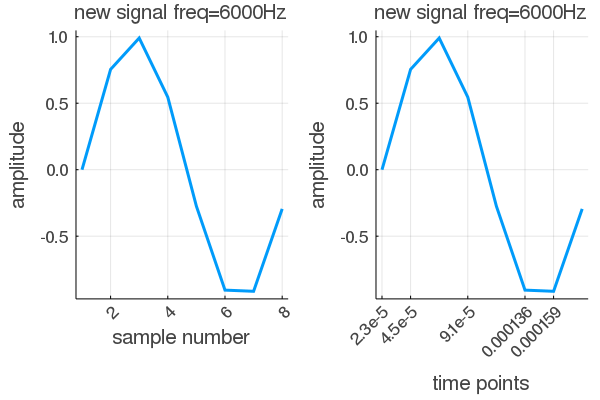

In [21]:
single_cycle_sample_num = Int(round((Fs*1)*(1/freq_new)))
increment = 1#Int(round( (1/10)*(single_cycle_sample_num) ))

pp1 = plot(ss_new[ 1:single_cycle_sample_num+1 ],
                     tickfontsize=12,legend=false,linewidth=3,xrotation=45)#,xticks=(xTicks,xTickLabels))
xlabel!("sample number",guidefontsize=14)

xTicks = Int.(round.(range(1,length=5,stop=single_cycle_sample_num)))
xTickLabels = string.(round.( collect(1:single_cycle_sample_num+1) ./ Fs ,digits=6 )[Int.(round.(range(1,length=5,stop=single_cycle_sample_num)))])

pp2 = plot(ss_new[ 1:single_cycle_sample_num+1 ],
                     tickfontsize=12,legend=false,linewidth=3,xrotation=45,xticks=(xTicks,xTickLabels))
xlabel!("time points",guidefontsize=14)
pp = plot(pp1,pp2,layout=grid(1,2))
title!(pp,"new signal freq=$(freq_new)Hz")
#xlabel!("sample number",guidefontsize=14)
ylabel!("amplitude",guidefontsize=14)
display("image/png", pp)

### <span style="color:orange">Make an aggregate signal from the 2 signals</span>

In [22]:
ss_total = ss_new .+ ss

220500-element Array{Float64,1}:
  0.0
  0.8964733530024598
  1.271478241335058
  0.9600580943453987
  0.26527049567922917
 -0.25192318270387004
 -0.15992481147277615
  0.5452991355105323
  1.4360819212900973
  1.94585685925869
  1.7576606725692407
  1.0213207972233354
  0.25005661412351576
  ⋮
 -1.0213207972141627
 -1.757660672557418
 -1.9458568592597472
 -1.4360819213004126
 -0.5452991355322498
  0.15992481146905635
  0.2519231827071656
 -0.2652704956609039
 -0.9600580943462478
 -1.2714782413364794
 -0.8964733530205323
 -7.0377552847896565e-12

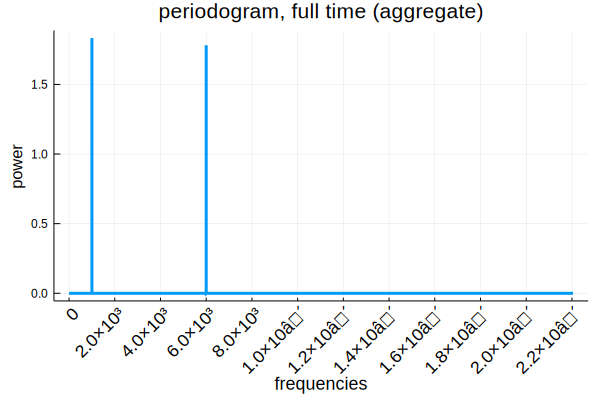

In [23]:
prdgrmFULL = DSP.Periodograms.periodogram(vec(ss_total), fs=Int(Fs2), window=DSP.Windows.hamming)
pp = plot(prdgrmFULL.freq,prdgrmFULL.power,legend=false,linewidth=3,xrotation=45, xticks = 0:2000:prdgrmFULL.freq[end],     
               xlabel="frequencies",xguidefontsize=12,xtickfontsize=12,ylabel="power",
                title="periodogram, full time (aggregate)")
display(pp)

In [24]:
spgrm = DSP.Periodograms.spectrogram(ss_total, fs=Fs, window=DSP.Windows.hamming)

DSP.Periodograms.Spectrogram{Float64,AbstractFFTs.Frequencies{Float64}}([8.292748060792558e-13 6.137131682355102e-13 … 2.174232813421993e-15 1.0990482126929924e-12; 2.296961911094957e-12 1.6002650361771625e-12 … 5.53755170166899e-13 2.4594007880449766e-12; … ; 7.906523244142601e-13 2.7658254612510557e-13 … 8.634844833376241e-13 5.44740414628871e-13; 3.947414438844915e-13 1.3782679964240198e-13 … 4.317761864148183e-13 2.716113609387112e-13], [0.0, 1.5950520833333333, 3.1901041666666665, 4.78515625, 6.380208333333333, 7.975260416666666, 9.5703125, 11.165364583333332, 12.760416666666666, 14.35546875  …  22035.64453125, 22037.239583333332, 22038.834635416664, 22040.4296875, 22042.024739583332, 22043.619791666664, 22045.21484375, 22046.809895833332, 22048.404947916664, 22050.0], 0.31249433106575963:0.31249433106575963:4.687414965986394)

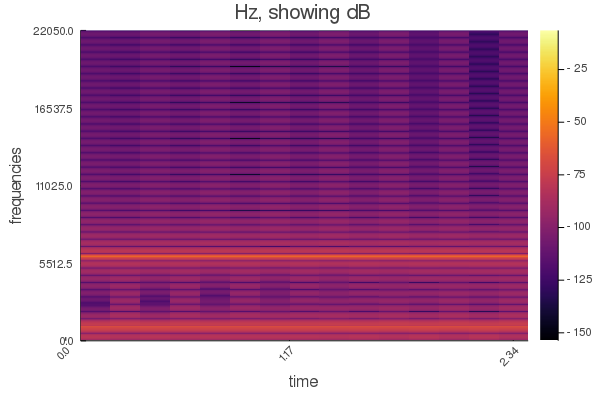

In [25]:
hmap = heatmap( pow2db.(spgrm.power),xlabel="time",xrotation=45,          
              yticks=(range(0,stop=spgrm.freq.n,length=5),
                  string.(range(0,stop=maximum(Int.(round.(spgrm.freq))),length=5)))   ,ylabel="frequencies",
     xticks=( round.(range(0,stop=2*length(spgrm.time),length=5),digits=2),
             string.(round.(range(0,stop=maximum(spgrm.time),length=5),digits=2)))  ,legend=true )
pp = plot(hmap) 
title!("Hz, showing dB")
display("image/png", pp)

### <span style="color:orange">Now add a 3rd signal component</span>

In [26]:
freq_new = 10000 #frequency of the signal
ww_new2 = 2*pi*freq_new #radian values for the frequency 
ss_new2 = sin.(ww_new2*tt) #create tone
ss_total = ss_new2 .+ ss_total;

In [27]:
spgrm = DSP.Periodograms.spectrogram(ss_total, fs=Fs, window=DSP.Windows.hamming);

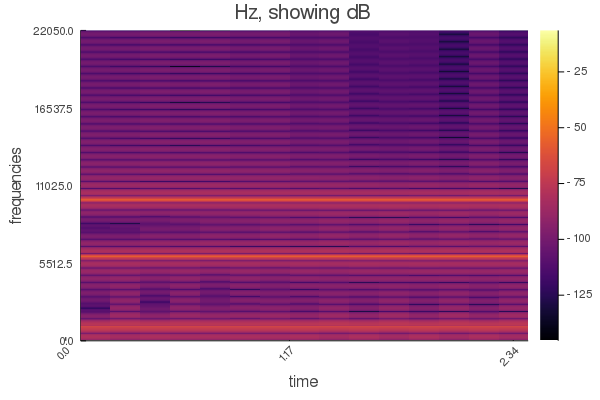

In [28]:
hmap = heatmap( pow2db.(spgrm.power),xlabel="time",xrotation=45,          
              yticks=(range(0,stop=spgrm.freq.n,length=5),
                  string.(range(0,stop=maximum(Int.(round.(spgrm.freq))),length=5)))   ,ylabel="frequencies",
     xticks=( round.(range(0,stop=2*length(spgrm.time),length=5),digits=2),
             string.(round.(range(0,stop=maximum(spgrm.time),length=5),digits=2)))  ,legend=true )
pp = plot(hmap) 
title!("Hz, showing dB")
display("image/png", pp)

### <span style="color:orange">Save this composite signal</span>

In [29]:
wavwrite(ss_total, "./fileWAVs/signal2.wav", Fs=Fs)

### <span style="color:orange">Load the signal again</span>

In [30]:
ss3, Fs3 = wavread("./fileWAVs/signal2.wav");

In [31]:
spgrm = DSP.Periodograms.spectrogram(vec(ss3), fs=Int(Fs3), window=DSP.Windows.hamming);

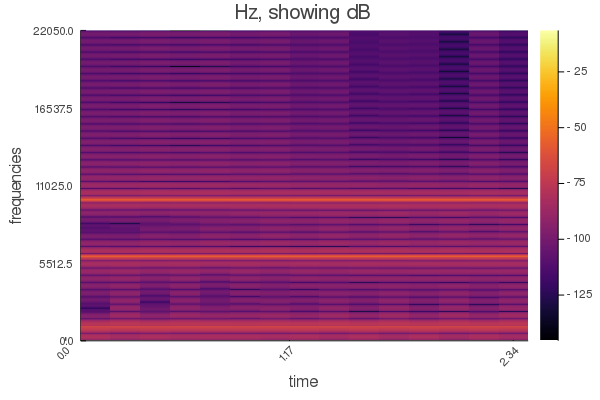

In [32]:
hmap = heatmap( pow2db.(spgrm.power),xlabel="time",xrotation=45,          
              yticks=(range(0,stop=spgrm.freq.n,length=5),
                  string.(range(0,stop=maximum(Int.(round.(spgrm.freq))),length=5))),ylabel="frequencies",
     xticks=( round.(range(0,stop=2*length(spgrm.time),length=5),digits=2),
             string.(round.(range(0,stop=maximum(spgrm.time),length=5),digits=2))),legend=true )
pp = plot(hmap) 
title!("Hz, showing dB")
display("image/png", pp)

### <span style="color:orange">The **windows** help with edge (boundary) data that can induce miscalculations so the windows help reduce their influence on the overall estimations</span>

In [33]:
freq_tmp = 20 #frequency of the signal
ww_tmp = 2*pi*freq_tmp
tt_tmp = range(0, stop=1, length=2*1000*1) 
ss_tmp = sin.(ww_tmp*tt_tmp);

In [34]:
#make the window
window_tmp = DSP.Windows.tukey(length(ss_tmp),0.25);

In [35]:
window_ss_tmp = window_tmp .* ss_tmp;

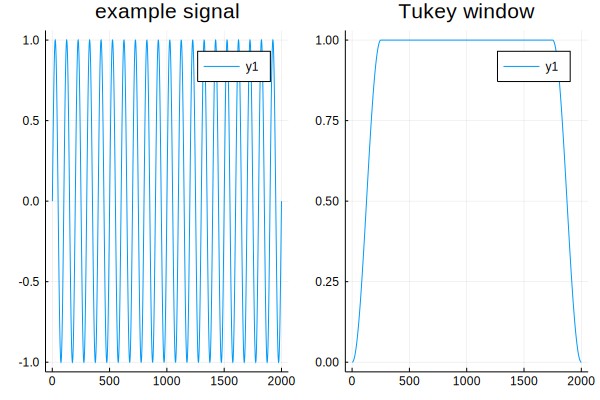

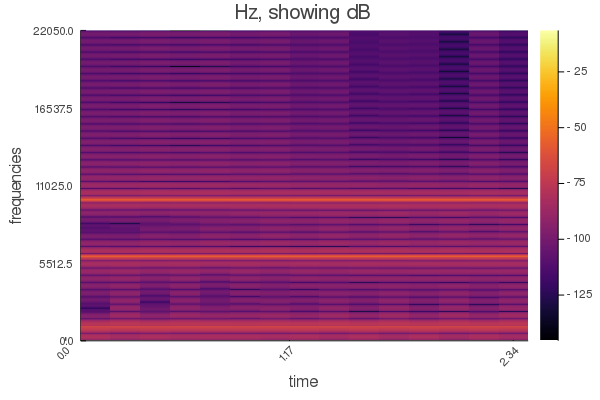

In [36]:
p1 = plot(ss_tmp)
title!("example signal")
p2 = plot(window_tmp)
title!("Tukey window")
p3 = plot(window_ss_tmp)
title!("Tukey Window applied to the example signal")
p=plot(p1,p2,layout=grid(1,2))
display(p)
p=plot(p3)
display("image/png", pp)

### <span style="color:orange">Get the FFT of the signal, because the Periodogram (and Spectrogram) does not maintain the information about the **phase** of the signal components</span>

In [37]:
#set up the window
window = DSP.Windows.tukey(length(ss3),0.2)
#apply the window to the signal
ss3_windowed = ss3 .* window
#use FFT and get the 'real' part of the FFT
samples_rFFT = AbstractFFTs.rfft(ss3_windowed)
samples_FFT = AbstractFFTs.fft(ss3_windowed)
#with 'abs' we get the magnitude of the complex numbers
samples_rFFT_abs = abs.(samples_rFFT)
samples_FFT_abs = abs.(samples_FFT)
#scale the sample according to the number of samples
samples_rFFT_abs_scaled = samples_rFFT_abs ./ (length(ss3))
samples_FFT_abs_scaled = samples_FFT_abs ./ (length(ss3))
#get the frequency bins for the number of samples and the sampling rate
rfftFreqBins = AbstractFFTs.rfftfreq(length(ss3), Fs);
fftFreqBins = AbstractFFTs.fftfreq(length(ss3), Fs);

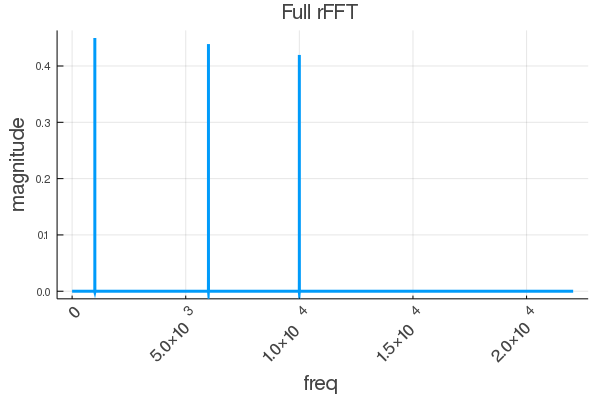

In [41]:
p = plot(rfftFreqBins,(samples_rFFT_abs_scaled),linewidth=3,legend=false,xrotation=45,xtickfontsize=12)
title!("Full rFFT",fontsize=14)
xlabel!(p,"freq",guidefontzise=14)
ylabel!(p,"magnitude",guidefontsize=14)
display("image/png", p)

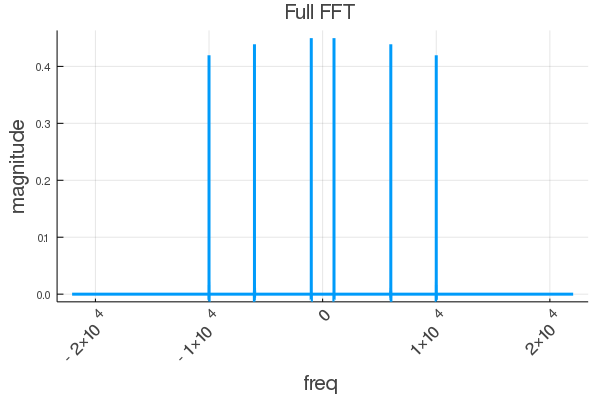

In [42]:
p = plot(fftFreqBins,(samples_FFT_abs_scaled),linewidth=3,legend=false,xrotation=45,xtickfontsize=12)
title!("Full FFT",fontsize=14)
xlabel!(p,"freq",guidefontzise=14)
ylabel!(p,"magnitude",guidefontsize=14)
display("image/png", p)

In [43]:
ind = findall(samples_rFFT_abs_scaled .== maximum(samples_rFFT_abs_scaled))

1-element Array{CartesianIndex{2},1}:
 CartesianIndex(5001, 1)

In [44]:
maximum(samples_rFFT_abs_scaled)

0.44968756565226836

In [45]:
samples_rFFT_abs_scaled[ind]

1-element Array{Float64,1}:
 0.44968756565226836

In [46]:
samples_rFFT[ind]

1-element Array{Complex{Float64},1}:
 7057.702771870713 - 98904.61379619577im

In [47]:
angle(samples_rFFT[ind][1])

-1.4995583981448926

In [48]:
rfftFreqBins[ind]

1-element Array{Float64,1}:
 1000.0

In [49]:
samples_rFFT_new = deepcopy(samples_rFFT ./ length(samples_rFFT));

In [50]:
samples_rFFT[ind] ./ length(samples_rFFT)

1-element Array{Complex{Float64},1}:
 0.0640148640091311 - 0.8970858658533326im

In [51]:
samples_rFFT_new[ind] *= 0.5

1-element Array{Complex{Float64},1}:
 0.03200743200456555 - 0.4485429329266663im

In [52]:
angle(samples_rFFT_new[ind][1])

-1.4995583981448926

In [53]:
abs(samples_rFFT_new[ind][1])

0.4496834868904825

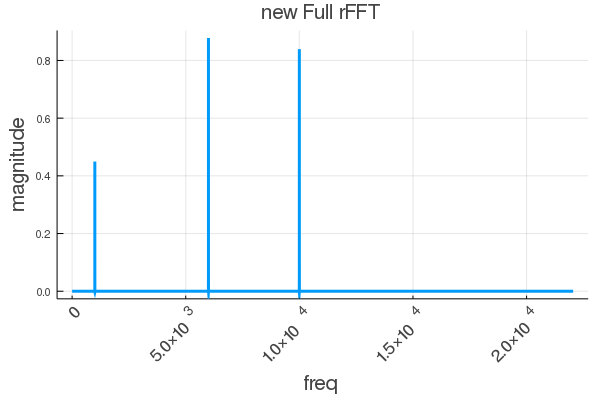

In [56]:
p = plot(rfftFreqBins,abs.(samples_rFFT_new),linewidth=3,legend=false,xrotation=45,xtickfontsize=12)
title!("new Full rFFT",fontsize=14)
xlabel!(p,"freq",guidefontzise=14)
ylabel!(p,"magnitude",guidefontsize=14)
display("image/png", p)

In [57]:
ind_12000 = findall(rfftFreqBins .== 12000)

1-element Array{Int64,1}:
 60001

In [58]:
samples_rFFT_new[ind_12000] 

1-element Array{Complex{Float64},1}:
 -1.2834852540207873e-12 + 1.77557805358606e-12im

In [59]:
samples_rFFT_new[ind_12000]  = samples_rFFT_new[ind]

1-element Array{Complex{Float64},1}:
 0.03200743200456555 - 0.4485429329266663im

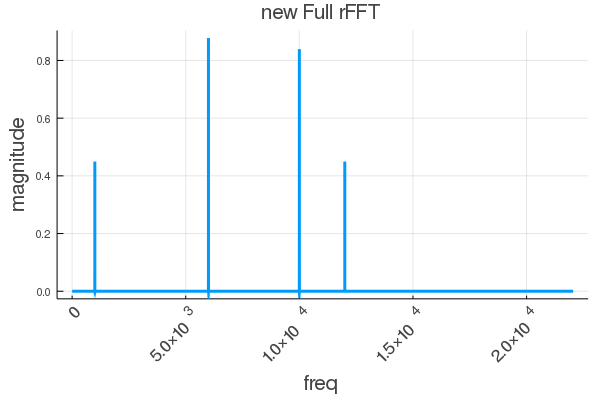

In [60]:
p = plot(rfftFreqBins,abs.(samples_rFFT_new),linewidth=3,legend=false,xrotation=45,xtickfontsize=12)
title!("new Full rFFT",fontsize=14)
xlabel!(p,"freq",guidefontzise=14)
ylabel!(p,"magnitude",guidefontsize=14)
display("image/png", p)

In [61]:
peak_pnts = findall(abs.(samples_rFFT_new) .> 0.2)

6-element Array{CartesianIndex{2},1}:
 CartesianIndex(5001, 1)
 CartesianIndex(30001, 1)
 CartesianIndex(30002, 1)
 CartesianIndex(50001, 1)
 CartesianIndex(50002, 1)
 CartesianIndex(60001, 1)

In [62]:
vinds = [ peak_pnts[x,1][1] for x in 1:length(peak_pnts) ]

6-element Array{Int64,1}:
  5001
 30001
 30002
 50001
 50002
 60001

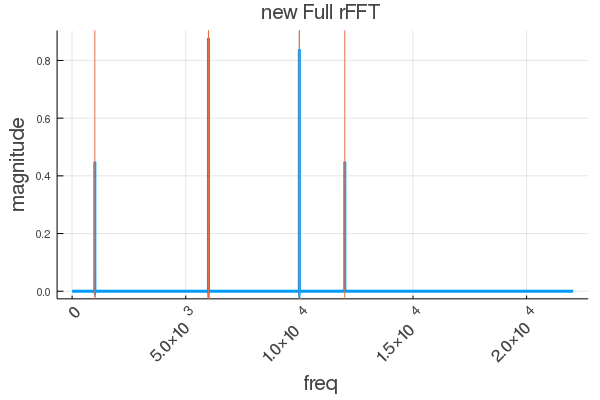

In [63]:
p = plot(rfftFreqBins,abs.(samples_rFFT_new),linewidth=3,legend=false,xrotation=45,xtickfontsize=12)
title!("new Full rFFT",fontsize=14)
xlabel!(p,"freq",guidefontzise=14)
ylabel!(p,"magnitude",guidefontsize=14)
vline!(rfftFreqBins[vinds])
display("image/png", p)

In [64]:
rfftFreqBins_tmp = Fs/4#rfftFreqBins[vinds]
amplitudes_tmp = 1#abs.(samples_rFFT_new[vinds])[1]
angles_tmp = 0#angle.(samples_rFFT_new[vinds])[1]

sigLen = seconds * Fs * 1

sig = map(0:1:sigLen-1) do n
        mapreduce(+, rfftFreqBins_tmp, amplitudes_tmp, angles_tmp) do freq, amplitude, phase
            #freq is in radians/sample
            amplitude * cos( freq * (n/Fs) + phase )
        end
    end;

In [65]:
Fs = 44100
rfftFreqBins_tmp = rfftFreqBins[vinds]
amplitudes_tmp = abs.(samples_rFFT_new[vinds])
angles_tmp = angle.(samples_rFFT_new[vinds])

sigLen = seconds * Fs * 1
x_inds = 0:1:sigLen-1
sig = zeros(length(rfftFreqBins_tmp), sigLen)

for  i in 1:length(rfftFreqBins_tmp) 
    sig[i,:] = amplitudes_tmp[i] .* sin.( rfftFreqBins_tmp[i] * x_inds * Fs .+ angles_tmp[i] )
end

In [66]:
(sig)

6×220500 Array{Float64,2}:
 -0.448543  -0.449658    -0.449122   …  -0.0982322  -0.0714682  -0.0444416
 -0.798831  -0.876021    -0.838604       0.212119    0.501253    0.724811
  0.214203   0.00996957  -0.221692      -0.134739    0.229479   -0.0376578
 -0.635099  -0.834452    -0.73647       -0.497712   -0.0241055   0.45809
  0.252951   0.0283272   -0.286216      -0.332879    0.219818    0.074745
 -0.448543  -0.356303    -0.0837068  …   0.129933   -0.189206   -0.412571

In [67]:
sig = sum(sig,dims=1)

1×220500 Array{Float64,2}:
 -1.86386  -2.47814  -2.61581  -0.818864  …  -0.72151  0.665771  0.762976

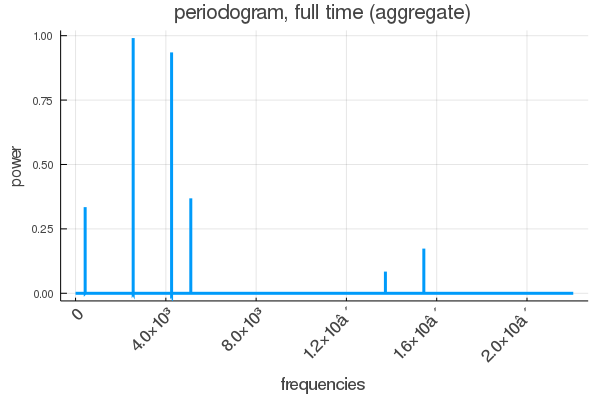

In [68]:
prdgrmFULL = DSP.Periodograms.periodogram(vec(sig), fs=Int(Fs2), window=DSP.Windows.hamming)
pp = plot(prdgrmFULL.freq,prdgrmFULL.power,legend=false,linewidth=3,xrotation=45, xticks = 0:4000:prdgrmFULL.freq[end],     
               xlabel="frequencies",xguidefontsize=12,xtickfontsize=12,ylabel="power",
                title="periodogram, full time (aggregate)")
display("image/png", pp)

In [69]:
spgrm = DSP.Periodograms.spectrogram(vec(sig), fs=Int(Fs), window=DSP.Windows.hamming);

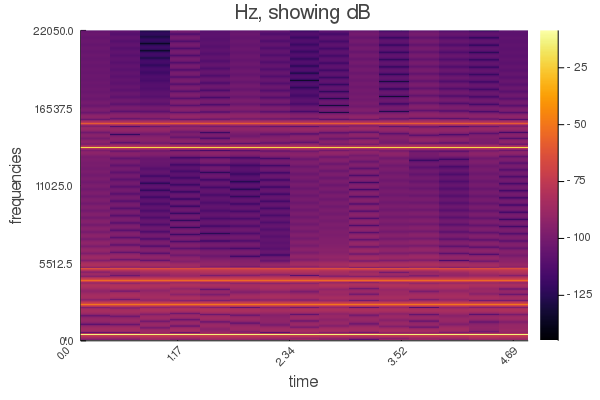

In [70]:
hmap = heatmap( pow2db.(spgrm.power),xlabel="time",xrotation=45,          
              yticks=(range(0,stop=spgrm.freq.n,length=5),
                  string.(range(0,stop=maximum(Int.(round.(spgrm.freq))),length=5)))   ,ylabel="frequencies",
     xticks=( round.(range(0,stop=length(spgrm.time),length=5),digits=2),
             string.(round.(range(0,stop=maximum(spgrm.time),length=5),digits=2)))  ,legend=true )
pp = plot(hmap)
title!("Hz, showing dB")
display("image/png", pp)

In [71]:
wavwrite(vec(sig), "./fileWAVs/signal3.wav", Fs=Fs)

### <span style="color:orange">Let's look at Audio files, and how to visualize the data they have</span>

In [72]:
run(`ls`)

alice.svg
animations
cloud1.svg
countryRoadNoStopWords.svg
countryRoad.svg
eagle.png
figs
fileMapStuff
fileWAVs
lettermask.svg
plottingJL1.ipynb
plottingJL2.ipynb
plottingJL3.ipynb
plottingJL4.ipynb
plottingJL5.ipynb
plottingJL6-RandJL.ipynb
plottingJL7-JLandR.ipynb
README.md
silhouette-bald-eagle.png
tl_2017_12_cousub
united_states_florida_administrative_boundaries_polygon


Process(`ls`, ProcessExited(0))

### <span style="color:orange">Downloaded a song by a band called **Distemper** from the website, *https://freemusicarchive.org/*</span>

https://freemusicarchive.org/music/Distemper

In [73]:
#music sample taken from: https://freemusicarchive.org/music/Distemper
relativePath1 = "./fileWAVs/"
fileWAVs = readdir(relativePath1)
println(size(fileWAVs))
println(fileWAVs)

(4,)
["Distemper_Iam_at_ease.wav", "signal1.wav", "signal2.wav", "signal3.wav"]


In [74]:

fileWAVs2 = [string(relativePath1,fileWAVs[ii]) for ii in 1:length(fileWAVs)]

4-element Array{String,1}:
 "./fileWAVs/Distemper_Iam_at_ease.wav"
 "./fileWAVs/signal1.wav"
 "./fileWAVs/signal2.wav"
 "./fileWAVs/signal3.wav"

In [75]:
fileName = fileWAVs2[1]

"./fileWAVs/Distemper_Iam_at_ease.wav"

### <span style="color:orange">Read the WAV file, make it into a vector</span>

In [76]:
WAV_SAMPLES, WAV_FramesSEC = wavread(fileName)#for non-normalized amplitude#, format="native")
WAV_SAMPLES = vec(WAV_SAMPLES)
WAV_SAMPLE_NUM = length(WAV_SAMPLES)
println("SampleNum=",size(WAV_SAMPLES),", length of the samples=",WAV_SAMPLE_NUM,
    " frame-rate=",WAV_FramesSEC)

SampleNum=(21741872,), length of the samples=21741872 frame-rate=44100.0


### <span style="color:orange">Now plot the raw audio</span>

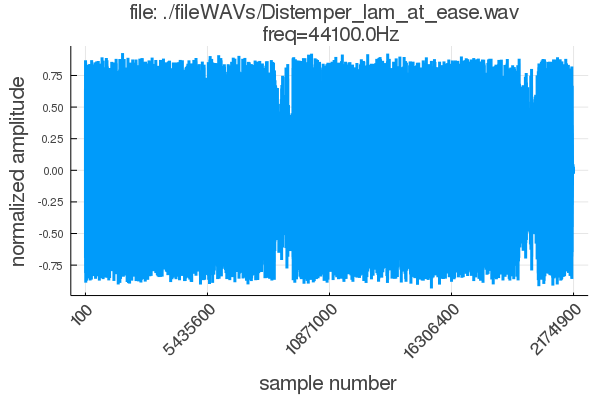

In [77]:
sampleInterval = 100
#to plot x-axis as seconds: plot(0:1/fs:(length(s)-1)/fs,s)
xTicks = Int.(round.(range(1,stop=length(WAV_SAMPLES[1:sampleInterval:end]),length=5)))
xTickLabels = string.(Int.(sampleInterval .* Int.(round.(range(1,stop=length(WAV_SAMPLES[1:sampleInterval:end]),length=5)))))
p = plot(WAV_SAMPLES[1:sampleInterval:end],xtickfontsize=12,legend=false,linewidth=3,xrotation=45,xticks=(xTicks,xTickLabels))
title!(p,"file: $(fileWAVs2[1]) \n freq=$(WAV_FramesSEC)Hz")
xlabel!("sample number",guidefontsize=14)
ylabel!("normalized amplitude",guidefontsize=14)
display("image/png", p)
savefig(p,"figs/fig1.png")

https://docs.juliadsp.org/stable/periodograms/#DSP.Periodograms.spectrogram

spectrogram(s, n=div(length(s), 8), noverlap=div(n, 2); onesided=eltype(s)<:Real, nfft=nextfastfft(n), fs=1, window=nothing)

Computes the spectrogram of a signal s based on segments with n samples with overlap of noverlap samples, and returns a Spectrogram object. See periodogram for description of optional keyword arguments.

### <span style="color:orange">Produce a spectrogram of the audio</span>

In [81]:
resolutionWin = 1000
smooth = 50
spgrm = DSP.Periodograms.spectrogram(WAV_SAMPLES[1:sampleInterval:end],
       resolutionWin, smooth, fs=WAV_FramesSEC, window=DSP.Windows.hamming)

DSP.Periodograms.Spectrogram{Float64,AbstractFFTs.Frequencies{Float32}}([2.545952304976295e-7 1.5316136700648687e-8 … 3.957330548533813e-9 1.2929941942141952e-7; 2.7690559294859813e-7 1.0653628221785093e-7 … 3.2828922287731998e-6 4.222508735357358e-7; … ; 4.4061627486425205e-6 1.8419147314170047e-7 … 8.766918122089254e-6 3.214788955342728e-5; 2.0211142428112068e-7 1.384425379736658e-6 … 2.58113855709032e-6 1.0581254096041846e-5], Float32[0.0, 44.1, 88.2, 132.29999, 176.4, 220.5, 264.59998, 308.69998, 352.8, 396.9  …  21653.1, 21697.2, 21741.299, 21785.398, 21829.5, 21873.6, 21917.7, 21961.799, 22005.898, 22050.0], 0.011337868480725623:0.021541950113378686:4.901360544217687)

### <span style="color:orange">Visualize the spectrogram as a heatmap</span>

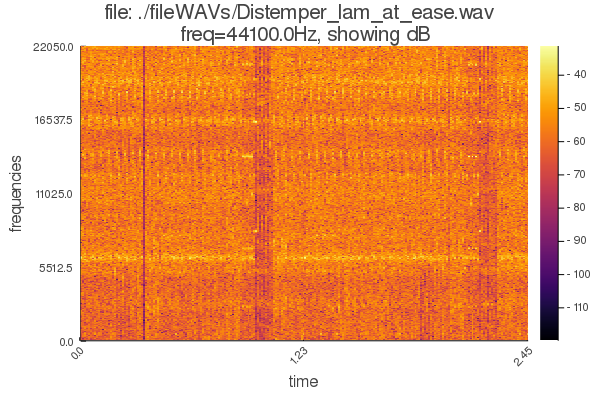

In [83]:
hmap = heatmap( pow2db.(spgrm.power),xlabel="time",xrotation=45,          
              yticks=(range(0,stop=spgrm.freq.n,length=5),
                  string.(range(0,stop=maximum(Int.(round.(spgrm.freq))),length=5)))   ,ylabel="frequencies",
     xticks=( round.(range(0,stop=2*length(spgrm.time),length=5),digits=2),
             string.(round.(range(0,stop=maximum(spgrm.time),length=5),digits=2)))  ,legend=true )
p = plot(hmap) 
title!("file: $(fileWAVs2[1]) \n freq=$(WAV_FramesSEC)Hz, showing dB")
savefig(p,"figs/fig1Spectrogram.png")
display("image/png", p)

### <span style="color:orange">Take a view of a 'slice' of the spectrogram at a certain time point to see the power at varies frequencies and the dB as well</span>

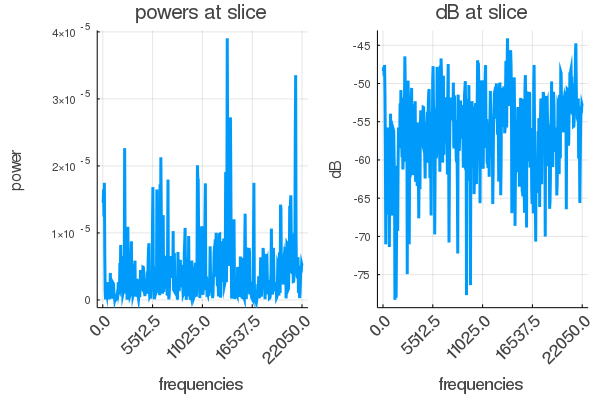

In [84]:
#now show the periodogram of the slice
slice = 100
slicePowers = spgrm.power[:,slice]
#print(sort(pow2db.(slicePowers)))

p1 = plot(slicePowers,legend=false,linewidth=3,
           xticks=(range(0,stop=spgrm.freq.n,length=5),
                  string.(  range(0,stop=maximum(Int.(round.(spgrm.freq))),length=5) )  )  ,xrotation=45,
               xlabel="frequencies",xguidefontsize=12,xtickfontsize=12,ylabel="power",title="powers at slice")
p2 = plot(pow2db.(slicePowers),legend=false,linewidth=3,
           xticks=(range(0,stop=spgrm.freq.n,length=5),
                  string.( range(0,stop=maximum(Int.(round.(spgrm.freq))),length=5)) ),xrotation=45,
               xlabel="frequencies",xguidefontsize=12,xtickfontsize=12,ylabel="dB",title="dB at slice")
p = plot(p1,p2,layout=grid(1,2))

savefig(p,"figs/songSpectrogramSlice")
display("image/png", p)

### <span style="color:orange">Find the 'peaks' in the dB levels with a function from the package 'chemometricstools'</span>

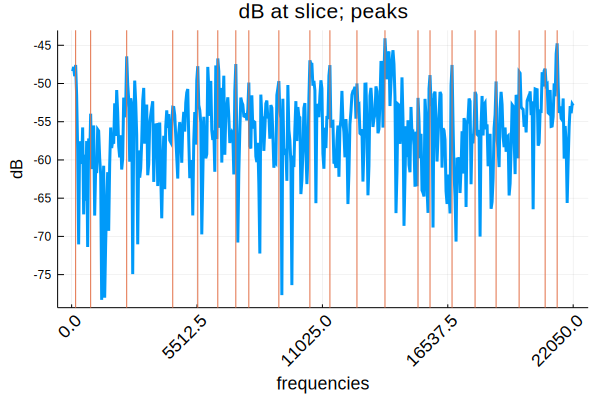

Any[4, 19, 55, 101, 126, 146, 164, 177, 207, 238, 258, 285, 313, 346, 358, 380, 403, 424, 447, 473, 485]
[176.0479, 836.22754, 2420.65868, 4445.20958, 5545.50898, 6425.7485, 7217.96407, 7790.11976, 9110.47904, 10474.8503, 11355.08982, 12543.41317, 13775.7485, 15228.14371, 15756.28743, 16724.5509, 17736.82635, 18661.07784, 19673.35329, 20817.66467, 21345.80838]


In [85]:
linesPeaks = findpeaks( pow2db.(slicePowers), m=10)
p = plot(pow2db.(slicePowers),legend=false,linewidth=3,
           xticks=(range(0,stop=spgrm.freq.n,length=5),
                  string.( range(0,stop=maximum(Int.(round.(spgrm.freq))),length=5)) ),xrotation=45,
               xlabel="frequencies",xguidefontsize=12,xtickfontsize=12,ylabel="dB",title="dB at slice; peaks")
vline!(linesPeaks)
display(p)
println(linesPeaks)
freqPeaks = round.(maximum(Int.(round.(spgrm.freq))) * (linesPeaks ./ length(slicePowers)),digits=5)
println(freqPeaks)

### <span style="color:orange">Get the periodogram for the full audio file</span>

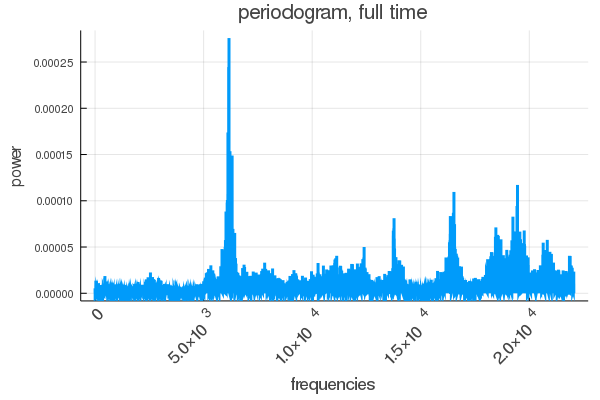

In [86]:
# power spectral density (PSD)
prdgrmFULL = DSP.Periodograms.periodogram(WAV_SAMPLES[1:sampleInterval:end], fs=WAV_FramesSEC, window=DSP.Windows.hamming)
p = plot(prdgrmFULL.freq,prdgrmFULL.power,legend=false,linewidth=3,xrotation=45,         
               xlabel="frequencies",xguidefontsize=12,xtickfontsize=12,ylabel="power",
                title="periodogram, full time")
savefig(p,"figs/songPeriodogramFULL")
display("image/png", p)

### <span style="color:orange">dB values of the periodogram full audio</span>

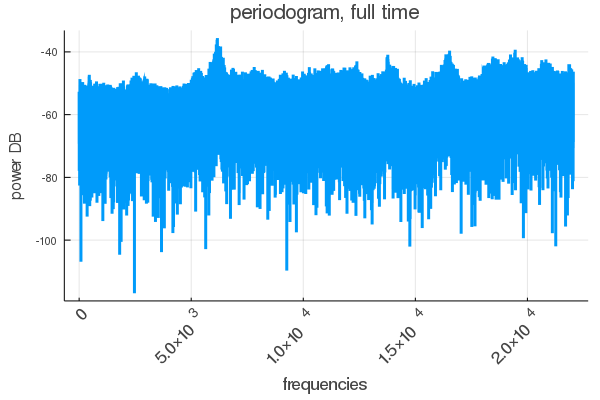

In [87]:
# power spectral density (PSD)
prdgrmFULL = DSP.Periodograms.periodogram(WAV_SAMPLES[1:sampleInterval:end], fs=WAV_FramesSEC, window=DSP.Windows.hamming)
p = plot(prdgrmFULL.freq,pow2db.(prdgrmFULL.power),legend=false,linewidth=3,xrotation=45,         
               xlabel="frequencies",xguidefontsize=12,xtickfontsize=12,ylabel="power DB",
                title="periodogram, full time")
savefig(p,"figs/songPeriodogramFULL_dBs")
display("image/png", p)

## <span style="color:orange">let's see how the DFT works under the hood</span>

(inspiration from project Nayuki)

$\zeta = e^{(-2\pi i)/N}$

$\hat{s}[f] = \sum^{N-1}_{n=0} s[n]\zeta^{f\cdot n}$

In [55]:
Fs = 200 #Sampling Frequency
seconds = 1 #number of seconds for the sound
tt = range(0, stop=seconds, length=Fs*seconds) #evenly spaced time points where the system was 'sampled'
freq = 10 #frequency of the signal
ww = 2*pi*freq #radian values for the frequency 
ss = sin.(ww*tt) #create tone

200-element Array{Float64,1}:
  0.0
  0.3105180318741688
  0.5903366919365284
  0.8117917024210207
  0.9529889090158392
  0.9999688468941563
  0.9480868435005095
  0.802472214201578
  0.5775211524135886
  0.29547344963467004
 -0.015786242013637018
 -0.3254852265102114
 -0.6030051071796143
  ⋮
  0.3254852265102162
  0.01578624201363636
 -0.295473449634669
 -0.5775211524135863
 -0.8024722142015752
 -0.9480868435005098
 -0.9999688468941563
 -0.9529889090158401
 -0.8117917024210233
 -0.5903366919365276
 -0.31051803187416954
 -2.4492935982947065e-15

In [56]:
function compute_dft(input)
	n = length(input)
	output = zeros(length(input))im
	for k=0 : n-1  
		s=0
		for t=0 : n-1
			s = s + input[t+1] * exp(-2im * pi * t * k / n)
		end
		output[k + 1] = s
	end
    return output
end


compute_dft (generic function with 1 method)

In [57]:
dft = compute_dft(ss);
println(size(dft))
println(dft[1:10])

(200,)
Complex{Float64}[8.930492404113148e-15 + 0.0im, 0.0015654353568590406 - 0.09965051331899397im, 0.006455396432759495 - 0.2054140451763783im, 0.015313991442781064 - 0.32473240431004585im, 0.029466807939949893 - 0.4683615002070296im, 0.05149386561946769 - 0.6542915992179258im, 0.08669876143920117 - 0.9171770933238094im, 0.14750481831186807 - 1.3360819299433913im, 0.2707502421885261 - 2.143208852277997im, 0.6338308527823052 - 4.453527698914025im]


In [58]:
println(abs.(dft[1:10]))

[8.930492404113148e-15, 0.09966280847234588, 0.20551545464715607, 0.32509329852042884, 0.46928753195279893, 0.6563147987083535, 0.9212657031242416, 1.3441996112729964, 2.1602430136741364, 4.498405330217942]


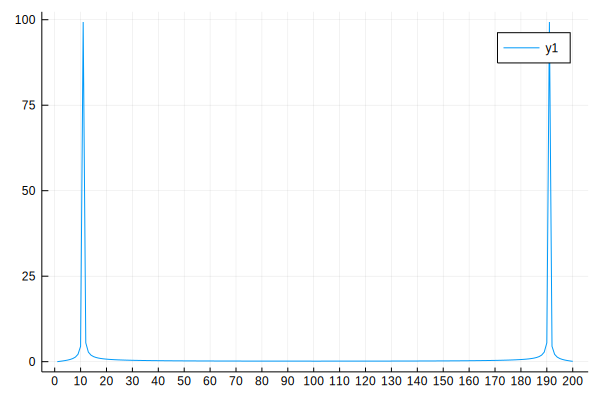

In [59]:
plot(1:length(dft),abs.(dft),xticks=0:10:length(dft))

In [60]:
Fs = 200 #Sampling Frequency
seconds = 1 #number of seconds for the sound
tt = range(0, stop=seconds, length=Fs*seconds) #evenly spaced time points where the system was 'sampled'
freq = 30 #frequency of the signal
ww = 2*pi*freq #radian values for the frequency 
ss2 = sin.(ww*tt) #create tone

200-element Array{Float64,1}:
  0.0
  0.8117917024210207
  0.9480868435005095
  0.2954734496346705
 -0.6030051071796143
 -0.9997196336934779
 -0.5645616825119187
  0.34037130340411215
  0.9620793630944627
  0.7832356315188906
 -0.04734298997155772
 -0.8385272362373763
 -0.9319681291524354
  ⋮
  0.8385272362373813
  0.04734298997158457
 -0.7832356315188794
 -0.9620793630944652
 -0.3403713034041391
  0.5645616825119024
  0.9997196336934777
  0.603005107179638
 -0.2954734496346507
 -0.948086843500506
 -0.8117917024210386
 -2.1558735510086122e-14

In [61]:
ss_ss2 = ss .+ ss2;

In [62]:
dft2 = compute_dft(ss_ss2);

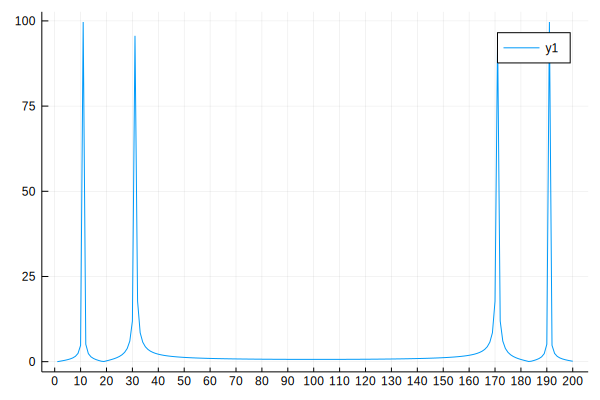

In [63]:
plot(1:length(dft2),abs.(dft2),xticks=0:10:length(dft2))

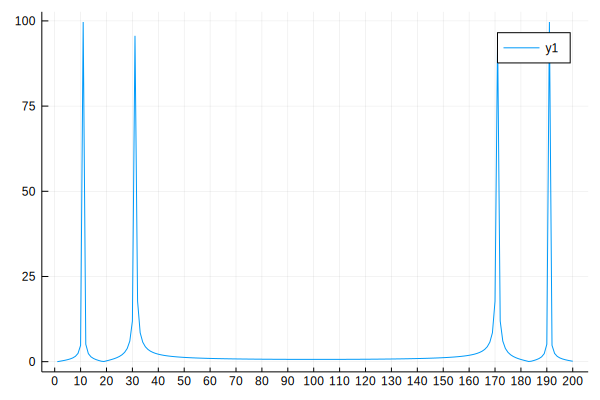

In [67]:
#using Julia FFT package
Y = fft(ss_ss2)
plot(1:length(Y),abs.(Y),xticks=0:10:length(Y))

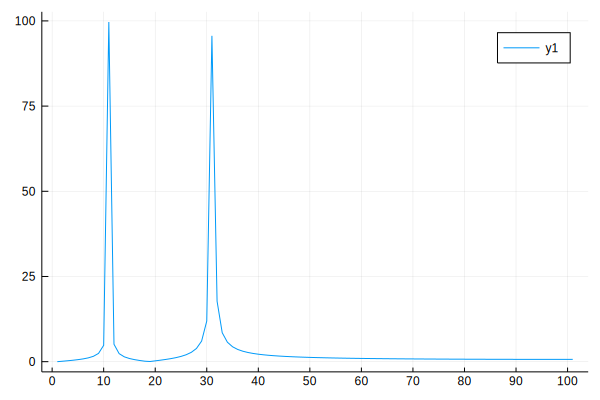

In [68]:
#to get only the real frequencies
#using Julia FFT package use 'rfft' for the 'real' frequencies
Y = rfft(ss_ss2)
plot(1:length(Y),abs.(Y),xticks=0:10:length(Y))

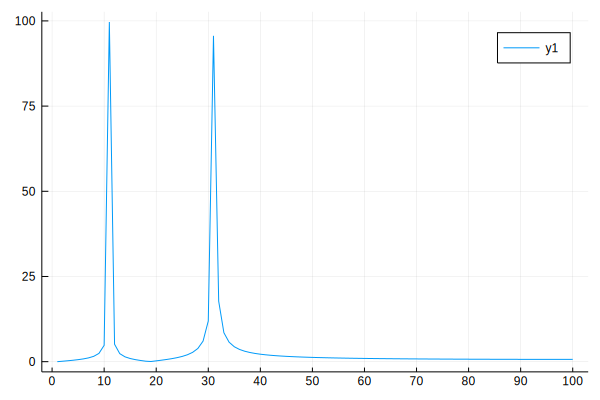

In [71]:
#using our approach we can just take the 1/2 of the output
rdft2 = dft2[1:Int(end/2)]
plot(1:length(rdft2),abs.(rdft2),xticks=0:10:length(rdft2))

In [ ]:
### <span style="color:orange"></span>